In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')
import seaborn as sns


import scipy.stats as stats
import statistics
import math

# Data import and cleaning

## Basecase

In [2]:
basecase = pd.read_csv("experiments/Citizen_Model_Experiments BaseCase -table.csv", skiprows= 22)

# Drop the first column only containing nan values
basecase = basecase.drop(["[all run data]"], axis= 1)

# Add a column of x values for plotting: the tick number
basecase["tick"] = list(basecase.index)

# clearly, each random seed's relative obseravations share the same ticks, so the tick column will repeat the tick number for each of them
tick_values = basecase.loc[basecase["random-seed"] == 1 ,  "tick"]
basecase["tick"] = pd.concat([tick_values, tick_values, tick_values, tick_values], ignore_index=True)
basecase

,debug?,verbose?,resolution,number-cw,number-police-officers,number-supported-initiatives,number-waste-collectors,interaction-chance,random-seed,mean [pls] of citizens,standard-deviation [pls] of citizens,tick
0,False,False,45,3,2,10,4,20,1,39.828781,9.679508,0
1,False,False,45,3,2,10,4,20,1,39.831612,9.679486,1
2,False,False,45,3,2,10,4,20,1,39.834419,9.679481,2
3,False,False,45,3,2,10,4,20,1,39.837230,9.679488,3
4,False,False,45,3,2,10,4,20,1,39.840085,9.679524,4
...,...,...,...,...,...,...,...,...,...,...,...,...
144667,False,False,45,3,2,10,4,20,4,89.180491,13.448468,36163
144668,False,False,45,3,2,10,4,20,4,89.182501,13.447657,36164
144669,False,False,45,3,2,10,4,20,4,89.184282,13.446726,36165
144670,False,False,45,3,2,10,4,20,4,89.186097,13.445824,36166


## Experiment 2: Increase Enforcements

In [3]:
experiment2 = pd.read_csv("experiments/Citizen_Model_Experiment_2_Increase_Enforcements-table.csv", skiprows= 22)

# Drop the first column only containing nan values
experiment2 = experiment2.drop(["[all run data]"], axis= 1)

# Add a column of x values for plotting: the tick number
experiment2["tick"] = list(experiment2.index)

# clearly, each random seed's relative obseravations share the same ticks, so the tick column will repeat the tick number for each of them
tick_values = experiment2.loc[experiment2["random-seed"] == 1 ,  "tick"]
experiment2["tick"] = pd.concat([tick_values, tick_values, tick_values, tick_values], ignore_index=True)
experiment2

,debug?,verbose?,resolution,number-cw,number-police-officers,number-supported-initiatives,number-waste-collectors,interaction-chance,random-seed,mean [pls] of citizens,tick
0,False,False,45,3,4,10,4,20,1,39.828781,0
1,False,False,45,3,4,10,4,20,1,39.834346,1
2,False,False,45,3,4,10,4,20,1,39.839926,2
3,False,False,45,3,4,10,4,20,1,39.845485,3
4,False,False,45,3,4,10,4,20,1,39.851030,4
...,...,...,...,...,...,...,...,...,...,...,...
144667,False,False,45,3,4,10,4,20,4,100.011544,36163
144668,False,False,45,3,4,10,4,20,4,100.011544,36164
144669,False,False,45,3,4,10,4,20,4,100.011544,36165
144670,False,False,45,3,4,10,4,20,4,100.011544,36166


## Experiment 3: Increase Social Capacity

In [4]:
experiment3 = pd.read_csv("experiments/Citizen_Model_Experiments_3_Increase_Social_Capacity-table2.csv", skiprows= 10)

# Add a column of x values for plotting: the tick number
experiment3["tick"] = list(experiment3.index)

# clearly, each random seed's relative obseravations share the same ticks, so the tick column will repeat the tick number for each of them
tick_values = experiment2.loc[experiment3["random-seed"] == 1 ,  "tick"]
experiment3["tick"] = pd.concat([tick_values, tick_values, tick_values, tick_values], ignore_index=True)
experiment3

,[all run data],number-supported-initiatives,number-waste-collectors,debug?,number-cw,interaction-chance,verbose?,number-police-officers,resolution,random-seed,mean [pls] of citizens,tick
0,NaN,10,4,True,8,20,False,2,45,1,39.733543,0
1,NaN,10,4,True,8,20,False,2,45,1,39.736348,1
2,NaN,10,4,True,8,20,False,2,45,1,39.739177,2
3,NaN,10,4,True,8,20,False,2,45,1,39.742018,3
4,NaN,10,4,True,8,20,False,2,45,1,39.744872,4
...,...,...,...,...,...,...,...,...,...,...,...,...
144667,NaN,10,4,True,8,20,False,2,45,4,86.698818,36163
144668,NaN,10,4,True,8,20,False,2,45,4,86.700760,36164
144669,NaN,10,4,True,8,20,False,2,45,4,86.702513,36165
144670,NaN,10,4,True,8,20,False,2,45,4,86.704475,36166


## Experiment 4: Increase Maintenance

In [5]:
Scenario4 = pd.read_csv("experiments/Citizen_Model_Experiments experiment_4_increase_maintenance.csv", skiprows= 22)

# Drop the first column only containing nan values
Scenario4 = Scenario4.drop(["[all run data]"], axis= 1)

# Add a column of x values for plotting: the tick number
Scenario4["tick"] = list(Scenario4.index)

# clearly, each random seed's relative obseravations share the same ticks, so the tick column will repeat the tick number for each of them
tick_values = Scenario4.loc[Scenario4["random-seed"] == 1 ,  "tick"]
Scenario4["tick"] = pd.concat([tick_values, tick_values, tick_values, tick_values], ignore_index=True)
Scenario4

,debug?,verbose?,resolution,number-cw,number-police-officers,number-supported-initiatives,number-waste-collectors,interaction-chance,random-seed,mean [pls] of citizens,standard-deviation [pls] of citizens,tick
0,False,False,45.0,3,2,10,11,20,1,39.828781,9.679508,0
1,False,False,45.0,3,2,10,11,20,1,39.831625,9.679481,1
2,False,False,45.0,3,2,10,11,20,1,39.834436,9.679509,2
3,False,False,45.0,3,2,10,11,20,1,39.837288,9.679531,3
4,False,False,45.0,3,2,10,11,20,1,39.840117,9.679494,4
...,...,...,...,...,...,...,...,...,...,...,...,...
144667,NaN,NaN,NaN,3,2,10,11,20,4,83.731577,15.729825,36163
144668,NaN,NaN,NaN,3,2,10,11,20,4,83.733696,15.728981,36164
144669,NaN,NaN,NaN,3,2,10,11,20,4,83.736253,15.728595,36165
144670,NaN,NaN,NaN,3,2,10,11,20,4,83.738308,15.727656,36166


## Experiment 5: Increase Social Support

In [6]:
experiment5 = pd.read_csv("experiments/Citizen_Model_Experiments 5_IncreaseSocialSupport-table.csv", skiprows= 6)

# Add a column of x values for plotting: the tick number
experiment5["tick"] = list(experiment5.index)

# clearly, each random seed's relative obseravations share the same ticks, so the tick column will repeat the tick number for each of them
tick_values = experiment5.loc[experiment5["random-seed"] == 1 ,  "tick"]
experiment5["tick"] = pd.concat([tick_values, tick_values, tick_values, tick_values], ignore_index=True)
experiment5

,[all run data],debug?,verbose?,resolution,number-cw,number-police-officers,number-supported-initiatives,number-waste-collectors,interaction-chance,random-seed,mean [pls] of citizens,standard-deviation [pls] of citizens,tick
0,NaN,False,False,45,3,2,24,4,20,1,39.828781,9.679508,0
1,NaN,False,False,45,3,2,24,4,20,1,39.831612,9.679486,1
2,NaN,False,False,45,3,2,24,4,20,1,39.834419,9.679481,2
3,NaN,False,False,45,3,2,24,4,20,1,39.837230,9.679488,3
4,NaN,False,False,45,3,2,24,4,20,1,39.840085,9.679524,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144667,NaN,False,False,45,3,2,24,4,20,4,90.894664,12.955933,36163
144668,NaN,False,False,45,3,2,24,4,20,4,90.896406,12.955156,36164
144669,NaN,False,False,45,3,2,24,4,20,4,90.898337,12.954550,36165
144670,NaN,False,False,45,3,2,24,4,20,4,90.900160,12.953695,36166


# Analysis

## Analysis common to the basecase and all experiments

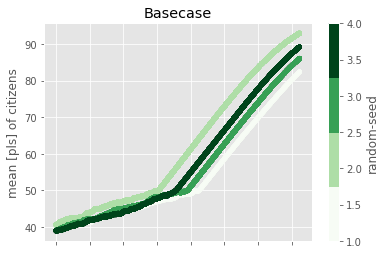

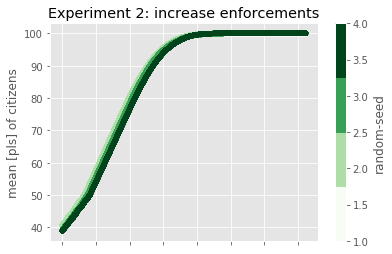

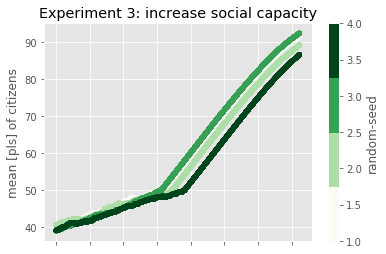

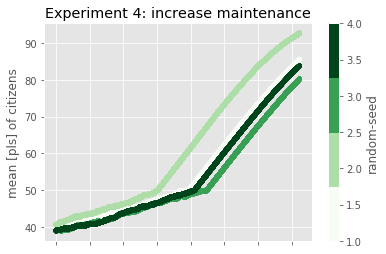

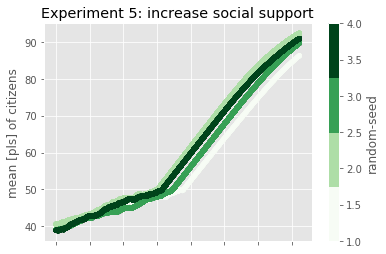

In [147]:
basecase.plot(kind= "scatter", x = "tick", y = "mean [pls] of citizens", c ="random-seed", cmap = plt.cm.get_cmap("Greens",4), title="Basecase" );
experiment2.plot(kind= "scatter", x = "tick", y = "mean [pls] of citizens", c ="random-seed", cmap = plt.cm.get_cmap("Greens",4), title="Experiment 2: increase enforcements" );
experiment3.plot(kind= "scatter", x = "tick", y = "mean [pls] of citizens", c ="random-seed", cmap = plt.cm.get_cmap("Greens",4), title="Experiment 3: increase social capacity" );
Scenario4.plot(kind= "scatter", x = "tick", y = "mean [pls] of citizens", c ="random-seed", cmap = plt.cm.get_cmap("Greens",4), title="Experiment 4: increase maintenance" );
experiment5.plot(kind= "scatter", x = "tick", y = "mean [pls] of citizens", c ="random-seed", cmap = plt.cm.get_cmap("Greens",4), title="Experiment 5: increase social support" );

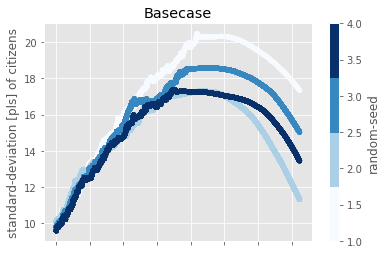

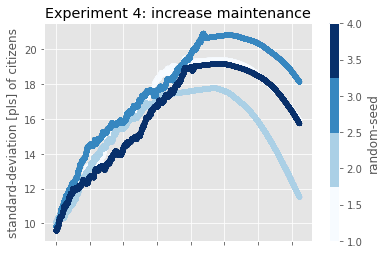

In [149]:
basecase.plot(kind= "scatter", x = "tick", y = "standard-deviation [pls] of citizens", c ="random-seed", cmap = plt.cm.get_cmap("Blues",4) , title= "Basecase");
Scenario4.plot(kind= "scatter", x = "tick", y = "standard-deviation [pls] of citizens", c ="random-seed", cmap = plt.cm.get_cmap("Blues",4) , title= "Experiment 4: increase maintenance");

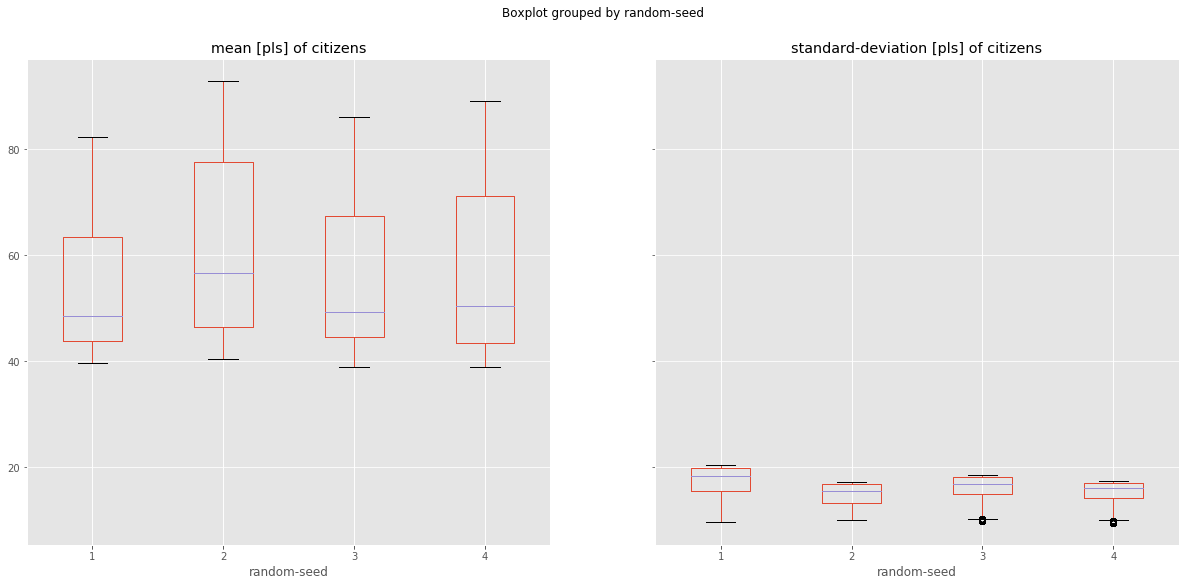

In [151]:
basecase.boxplot(column=["mean [pls] of citizens", "standard-deviation [pls] of citizens"], by="random-seed", figsize=(20,9));

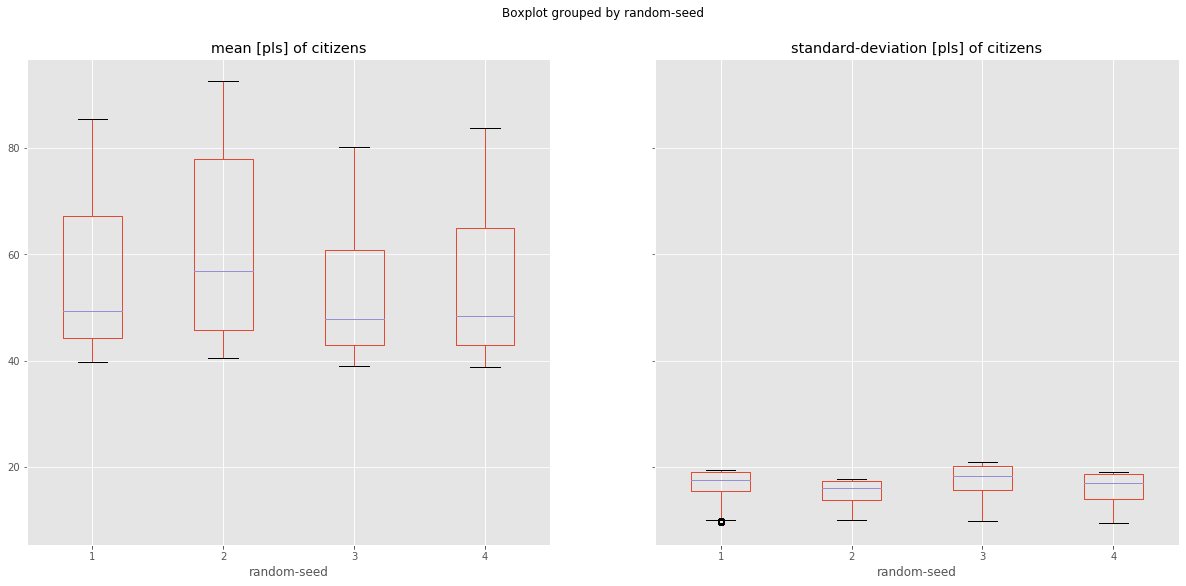

In [152]:
Scenario4.boxplot(column=["mean [pls] of citizens", "standard-deviation [pls] of citizens"], by="random-seed", figsize=(20,9));

## Basecase

In [7]:
# Each groups (mean and standard deviation) observations having the same of random seed represent specific populations of data (or sample of specific populations of data)
# for each of such sumples, we compute a numerical statistical summary.
# In this way we can compare distributions' statistical parameters across populations defined by the different random seeds
basecase_kpi = basecase.groupby("random-seed")[ ["mean [pls] of citizens", "standard-deviation [pls] of citizens"] ]
basecase_kpi.describe()

mean [pls] of citizens                                   \
                             count       mean        std        min   
random-seed                                                           
1                          36168.0  53.727742  12.675816  39.673346   
2                          36168.0  61.710576  17.063368  40.517594   
3                          36168.0  55.840714  14.163488  38.999809   
4                          36168.0  57.433539  15.860949  38.908268   

                                                         \
                   25%        50%        75%        max   
random-seed                                               
1            43.927719  48.546248  63.449465  82.403872   
2            46.555499  56.667963  77.655556  92.940035   
3            44.671432  49.423830  67.508415  86.071028   
4            43.537985  50.525358  71.300230  89.188141   

            standard-deviation [pls] of citizens                       \
                                           count       mean       std   
random-seed                                                             
1                                        36168.0  17.292801  3.036622   
2                                        36168.0  15.033821  2.044691   
3                                        36168.0  16.195984  2.428169   
4                                        36168.0  15.315238  2.086714   

                                                                    
                   min        25%        50%        75%        max  
random-seed                                                         
1             9.679433  15.470398  18.345222  19.845300  20.491506  
2            10.071334  13.380670  15.513447  16.959690  17.307588  
3             9.821924  15.031515  16.826394  18.250267  18.579188  
4             9.577127  14.216480  16.133631  17.008073  17.377699

In [8]:
# generate one single dataset for means having tick as the key column
basecase_seed1 = basecase.loc[(basecase["random-seed"] == 1) , ["tick", "mean [pls] of citizens"]]
basecase_seed2 = basecase.loc[(basecase["random-seed"] == 2) , ["tick", "mean [pls] of citizens"]]
basecase_seed3 = basecase.loc[(basecase["random-seed"] == 3) , ["tick", "mean [pls] of citizens"]]
basecase_seed4 = basecase.loc[(basecase["random-seed"] == 4) , ["tick", "mean [pls] of citizens"]]

basecase_means = pd.merge(basecase_seed1, basecase_seed2, on= "tick")
basecase_means = pd.merge(basecase_means, basecase_seed3, on= "tick")
basecase_means = pd.merge(basecase_means, basecase_seed4, on= "tick")
basecase_means.columns = ["tick","mean pls - seed 1", "mean pls - seed 2", "mean pls - seed 3", "mean pls - seed 4"]

# generate one single dataset for standard deviations having tick as the key column
basecase_seed1_stdev = basecase.loc[(basecase["random-seed"] == 1) , ["tick", "standard-deviation [pls] of citizens"]]
basecase_seed2_stdev = basecase.loc[(basecase["random-seed"] == 2) , ["tick", "standard-deviation [pls] of citizens"]]
basecase_seed3_stdev = basecase.loc[(basecase["random-seed"] == 3) , ["tick", "standard-deviation [pls] of citizens"]]
basecase_seed4_stdev = basecase.loc[(basecase["random-seed"] == 4) , ["tick", "standard-deviation [pls] of citizens"]]

basecase_stdevs = pd.merge(basecase_seed1_stdev, basecase_seed2_stdev, on= "tick")
basecase_stdevs = pd.merge(basecase_stdevs, basecase_seed3_stdev, on= "tick")
basecase_stdevs = pd.merge(basecase_stdevs, basecase_seed4_stdev, on= "tick")
basecase_stdevs.columns = ["tick","stdev pls - seed 1", "stdev pls - seed 2", "stdev pls - seed 3", "stdev pls - seed 4"]

In [9]:
basecase_means

,tick,mean pls - seed 1,mean pls - seed 2,mean pls - seed 3,mean pls - seed 4
0,0,39.828781,40.542336,38.999809,38.908268
1,1,39.831612,40.545137,39.002654,38.911120
2,2,39.834419,40.547985,39.005526,38.913962
3,3,39.837230,40.550818,39.008359,38.916790
4,4,39.840085,40.553651,39.011166,38.919636
...,...,...,...,...,...
36163,36163,82.394638,92.933062,86.062157,89.180491
36164,36164,82.396833,92.935018,86.063997,89.182501
36165,36165,82.399400,92.936370,86.066387,89.184282
36166,36166,82.401605,92.938359,86.068778,89.186097


In [10]:
basecase_stdevs

,tick,stdev pls - seed 1,stdev pls - seed 2,stdev pls - seed 3,stdev pls - seed 4
0,0,9.679508,10.071388,9.822304,9.577178
1,1,9.679486,10.071366,9.822325,9.577165
2,2,9.679481,10.071371,9.822312,9.577158
3,3,9.679488,10.071370,9.822251,9.577160
4,4,9.679524,10.071383,9.822264,9.577159
...,...,...,...,...,...
36163,36163,17.338460,11.307046,15.027810,13.448468
36164,36164,17.337763,11.306303,15.026821,13.447657
36165,36165,17.337542,11.305239,15.026297,13.446726
36166,36166,17.336829,11.304574,15.025601,13.445824


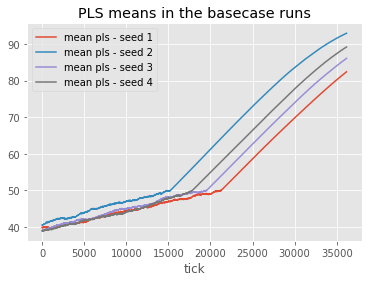

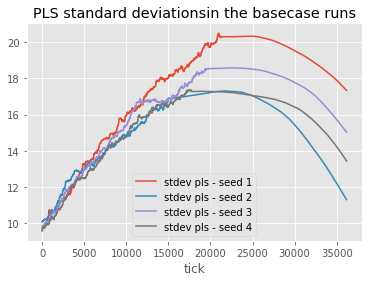

In [11]:
basecase_means.plot(kind= "line", x = "tick", title= "PLS means in the basecase runs"); 
basecase_stdevs.plot(kind= "line", x = "tick",title= "PLS standard deviationsin the basecase runs");

## Experiment 2: Increase Enforcements

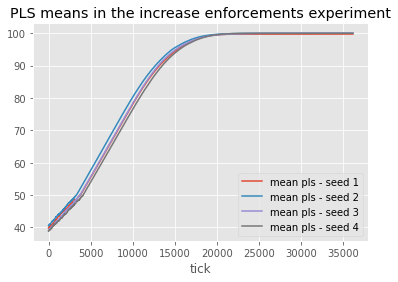

In [12]:
# generate one single dataset for means having tick as the key column
experiment2_seed1 = experiment2.loc[(experiment2["random-seed"] == 1) , ["tick", "mean [pls] of citizens"]]
experiment2_seed2 = experiment2.loc[(experiment2["random-seed"] == 2) , ["tick", "mean [pls] of citizens"]]
experiment2_seed3 = experiment2.loc[(experiment2["random-seed"] == 3) , ["tick", "mean [pls] of citizens"]]
experiment2_seed4 = experiment2.loc[(experiment2["random-seed"] == 4) , ["tick", "mean [pls] of citizens"]]

experiment2_means = pd.merge(experiment2_seed1, experiment2_seed2, on= "tick")
experiment2_means = pd.merge(experiment2_means, experiment2_seed3, on= "tick")
experiment2_means = pd.merge(experiment2_means, experiment2_seed4, on= "tick")
experiment2_means.columns = ["tick","mean pls - seed 1", "mean pls - seed 2", "mean pls - seed 3", "mean pls - seed 4"]

experiment2_means.plot(kind= "line", x = "tick", title= "PLS means in the increase enforcements experiment"); 

## Experiment 3: Increase Social Capacity

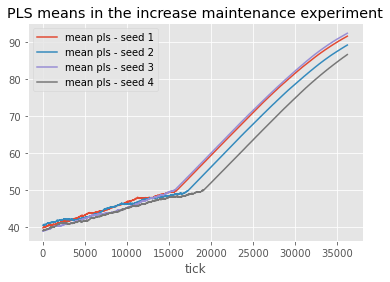

In [13]:
# generate one single dataset for means having tick as the key column
experiment3_seed1 = experiment3.loc[(experiment3["random-seed"] == 1) , ["tick", "mean [pls] of citizens"]]
experiment3_seed2 = experiment3.loc[(experiment3["random-seed"] == 2) , ["tick", "mean [pls] of citizens"]]
experiment3_seed3 = experiment3.loc[(experiment3["random-seed"] == 3) , ["tick", "mean [pls] of citizens"]]
experiment3_seed4 = experiment3.loc[(experiment3["random-seed"] == 4) , ["tick", "mean [pls] of citizens"]]

experiment3_means = pd.merge(experiment3_seed1, experiment3_seed2, on= "tick")
experiment3_means = pd.merge(experiment3_means, experiment3_seed3, on= "tick")
experiment3_means = pd.merge(experiment3_means, experiment3_seed4, on= "tick")
experiment3_means.columns = ["tick","mean pls - seed 1", "mean pls - seed 2", "mean pls - seed 3", "mean pls - seed 4"]

experiment3_means.plot(kind= "line", x = "tick", title= "PLS means in the increase maintenance experiment"); 

## Experiment 4: Increase Maintenance

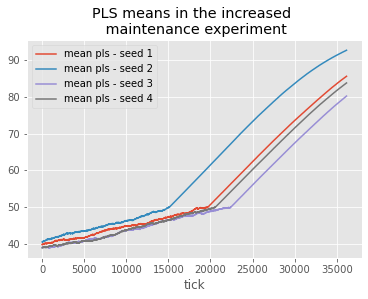

In [14]:
# generate one single dataset for means having tick as the key column
Scenario4_seed1 = Scenario4.loc[(Scenario4["random-seed"] == 1) , ["tick", "mean [pls] of citizens"]]
Scenario4_seed2 = Scenario4.loc[(Scenario4["random-seed"] == 2) , ["tick", "mean [pls] of citizens"]]
Scenario4_seed3 = Scenario4.loc[(Scenario4["random-seed"] == 3) , ["tick", "mean [pls] of citizens"]]
Scenario4_seed4 = Scenario4.loc[(Scenario4["random-seed"] == 4) , ["tick", "mean [pls] of citizens"]]

Scenario4_means = pd.merge(Scenario4_seed1, Scenario4_seed2, on= "tick")
Scenario4_means = pd.merge(Scenario4_means, Scenario4_seed3, on= "tick")
Scenario4_means = pd.merge(Scenario4_means, Scenario4_seed4, on= "tick")
Scenario4_means.columns = ["tick","mean pls - seed 1", "mean pls - seed 2", "mean pls - seed 3", "mean pls - seed 4"]

Scenario4_means.plot(kind= "line", x = "tick", title= "PLS means in the increased \n maintenance experiment");

## Experiment 5: Increase Social Support

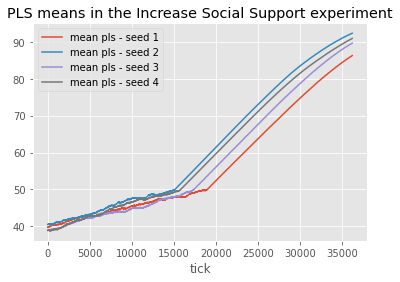

In [15]:
# generate one single dataset for means having tick as the key column
experiment5_seed1 = experiment5.loc[(experiment5["random-seed"] == 1) , ["tick", "mean [pls] of citizens"]]
experiment5_seed2 = experiment5.loc[(experiment5["random-seed"] == 2) , ["tick", "mean [pls] of citizens"]]
experiment5_seed3 = experiment5.loc[(experiment5["random-seed"] == 3) , ["tick", "mean [pls] of citizens"]]
experiment5_seed4 = experiment5.loc[(experiment5["random-seed"] == 4) , ["tick", "mean [pls] of citizens"]]

experiment5_means = pd.merge(experiment5_seed1, experiment5_seed2, on= "tick")
experiment5_means = pd.merge(experiment5_means, experiment5_seed3, on= "tick")
experiment5_means = pd.merge(experiment5_means, experiment5_seed4, on= "tick")
experiment5_means.columns = ["tick","mean pls - seed 1", "mean pls - seed 2", "mean pls - seed 3", "mean pls - seed 4"]

experiment5_means.plot(kind= "line", x = "tick", title= "PLS means in the Increase Social Support experiment");

## Comparison across experiments

In [16]:
basecase_aggregated = pd.concat([basecase_means.iloc[:, 0], basecase_means.iloc[:, 1:].mean(axis= 1) ], axis= 1)
basecase_aggregated.columns = ["tick", "PLS mean - basecase"]

experiment2_aggregated = pd.concat([experiment2_means.iloc[:, 0], experiment2_means.iloc[:, 1:].mean(axis= 1) ], axis= 1)
experiment2_aggregated.columns = ["tick", "PLS mean - experiment 2"]

experiment3_aggregated = pd.concat([experiment3_means.iloc[:, 0], experiment3_means.iloc[:, 1:].mean(axis= 1) ], axis= 1)
experiment3_aggregated.columns = ["tick", "PLS mean - experiment 3"]

experiment4_aggregated = pd.concat([Scenario4_means.iloc[:, 0], Scenario4_means.iloc[:, 1:].mean(axis= 1) ], axis= 1)
experiment4_aggregated.columns = ["tick", "PLS mean - experiment 4"]

experiment5_aggregated = pd.concat([experiment5_means.iloc[:, 0], experiment5_means.iloc[:, 1:].mean(axis= 1) ], axis= 1)
experiment5_aggregated.columns = ["tick", "PLS mean - experiment 5"]



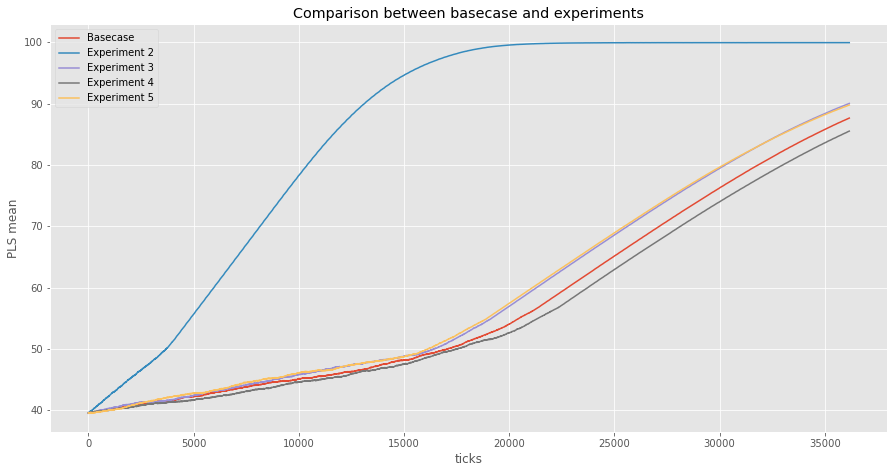

In [17]:
plt.figure(figsize=(15,7.5))

plt.plot(basecase_aggregated["tick"], basecase_aggregated["PLS mean - basecase"], label="Basecase" );
plt.plot(experiment2_aggregated["tick"], experiment2_aggregated["PLS mean - experiment 2"], label="Experiment 2" );
plt.plot(experiment3_aggregated["tick"], experiment3_aggregated["PLS mean - experiment 3"], label="Experiment 3" );
plt.plot(experiment4_aggregated["tick"], experiment4_aggregated["PLS mean - experiment 4"], label="Experiment 4" );
plt.plot(experiment5_aggregated["tick"], experiment5_aggregated["PLS mean - experiment 5"], label="Experiment 5" );

plt.legend();
plt.title("Comparison between basecase and experiments");
plt.xlabel("ticks");
plt.ylabel("PLS mean");

## T Test for p values

In [22]:
resolution = 45
ticks_1_year = 60 / resolution * 24 * 365
number_years = 0

base_case = basecase_means.iloc[int(number_years*ticks_1_year)]
base_case = base_case.drop("tick")
#base_case = [base_case["1_mean"], base_case["2_mean"], base_case["3_mean"],base_case["4_mean"]]

Scenario_2 = experiment2_means.iloc[int(number_years*ticks_1_year)]
Scenario_2 = Scenario_2.drop("tick")

Scenario_3 = experiment3_means.iloc[int(number_years*ticks_1_year)]
Scenario_3 = Scenario_3.drop("tick")

Scenario_4 = Scenario4_means.iloc[int(number_years*ticks_1_year)]
Scenario_4 = Scenario_4.drop("tick")

Scenario_5 = experiment5_means.iloc[int(number_years*ticks_1_year)]
Scenario_5 = Scenario_5.drop("tick")


print(stats.ttest_ind(a=base_case,b=Scenario_2,equal_var=False))
print(stats.ttest_ind(a=base_case,b=Scenario_3,equal_var=False))
print(stats.ttest_ind(a=base_case,b=Scenario_4,equal_var=False))
print(stats.ttest_ind(a=base_case,b=Scenario_5,equal_var=False))

Ttest_indResult(statistic=0.0, pvalue=1.0)
Ttest_indResult(statistic=1.004213946499991, pvalue=0.37184693388191625)
Ttest_indResult(statistic=0.0, pvalue=1.0)
Ttest_indResult(statistic=0.0, pvalue=1.0)
